Data Loading and Exploration

Preprocessing (Encoding, Scaling)

Outlier Detection & Removal

Feature Engineering

Regularization (Ridge, Lasso)

Polynomial Features

Model Evaluation with Cross-Validation

Final Model Comparison



In [1]:
# 📦 Step 0: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings("ignore")


In [2]:
# 📥 Step 1: Load the Data
df = pd.read_csv("D:\Data Sciences courrses\Regression\datasets\insurance.csv")
df.head(10)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
# 🧹 Step 3: One-Hot Encode Categorical Variables
df_encoded = pd.get_dummies(df, drop_first=True)  # sex, smoker, region

df_encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [4]:

# Features and Target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

In [5]:
# ⚠️ Step 4: Outlier Detection & Removal (IQR method on 'charges')
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = df_encoded[(df_encoded['charges'] >= Q1 - 1.5*IQR) & (df_encoded['charges'] <= Q3 + 1.5*IQR)]



In [ ]:
Q3 + 1.5*IQR

In [ ]:
filtered_df

In [6]:

# Update X and y
X = filtered_df.drop('charges', axis=1)
y = filtered_df['charges']

In [7]:
# ⚙️ Step 5: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X

In [ ]:
X_scaled

In [ ]:
X.columns

In [27]:
# 🧠 Step 6: Feature Selection using Recursive Feature Elimination (RFE)
model = LinearRegression()
rfe = RFE(model, n_features_to_select=8)
rfe.fit(X_scaled, y)
X_selected = X.iloc[:, rfe.support_]

print("Selected Features:", X_selected.columns.tolist())


Selected Features: ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']


In [28]:
# 🧪 Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [29]:
# 📈 Step 8: Base Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression R²: 0.5568176371144351
Linear Regression RMSE: 5257.931785883052


In [30]:
# 🔁 Step 9: Ridge Regression (L2 Regularization)
ridge = Ridge()
params = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_ridge = GridSearchCV(ridge, params, cv=5)
grid_ridge.fit(X_train, y_train)

print("Best Ridge Alpha:", grid_ridge.best_params_)

ridge_best = grid_ridge.best_estimator_
y_pred_ridge = ridge_best.predict(X_test)

print("Ridge R²:", r2_score(y_test, y_pred_ridge))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))


Best Ridge Alpha: {'alpha': 0.1}
Ridge R²: 0.5569405434314876
Ridge RMSE: 5257.202652803899


In [31]:
# 🔁 Step 10: Lasso Regression (L1 Regularization)
lasso = Lasso()
params = {'alpha': [0.001, 0.01, 0.1, 1]}
grid_lasso = GridSearchCV(lasso, params, cv=5)
grid_lasso.fit(X_train, y_train)

print("Best Lasso Alpha:", grid_lasso.best_params_)

lasso_best = grid_lasso.best_estimator_
y_pred_lasso = lasso_best.predict(X_test)

print("Lasso R²:", r2_score(y_test, y_pred_lasso))
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))


Best Lasso Alpha: {'alpha': 1}
Lasso R²: 0.5568651204687965
Lasso RMSE: 5257.650106210265


In [39]:
# ➕ Step 11: Polynomial Features (Optional Nonlinear Extension)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_selected)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

lr_poly = LinearRegression()
# lr_poly = Lasso()

lr_poly.fit(X_train_poly, y_train)
y_pred_poly = lr_poly.predict(X_test_poly)

print("Polynomial Regression R²:", r2_score(y_test, y_pred_poly))
print("Polynomial Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))


Polynomial Regression R²: 0.5722173596327413
Polynomial Regression RMSE: 5165.772684399965


In [ ]:
# ➕ Step 11: Polynomial Features (Optional Nonlinear Extension)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_selected)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# lr_poly = LinearRegression()
lr_poly = Lasso()

lr_poly.fit(X_train_poly, y_train)
y_pred_poly = lr_poly.predict(X_test_poly)

print("Polynomial Regression R²:", r2_score(y_test, y_pred_poly))
print("Polynomial Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))


Polynomial Regression R²: 0.5729064645744963
Polynomial Regression RMSE: 5161.6102969072535


In [33]:
# 🔍 Step 12: Cross-Validation Scores
cv_lr = cross_val_score(LinearRegression(), X_selected, y, cv=5, scoring='r2')
print("Linear Regression CV R² Mean:", cv_lr.mean())

cv_ridge = cross_val_score(ridge_best, X_selected, y, cv=5, scoring='r2')
print("Ridge CV R² Mean:", cv_ridge.mean())

cv_lasso = cross_val_score(lasso_best, X_selected, y, cv=5, scoring='r2')
print("Lasso CV R² Mean:", cv_lasso.mean())


Linear Regression CV R² Mean: 0.5963741370565941
Ridge CV R² Mean: 0.5963712409507446
Lasso CV R² Mean: 0.5963676701965248


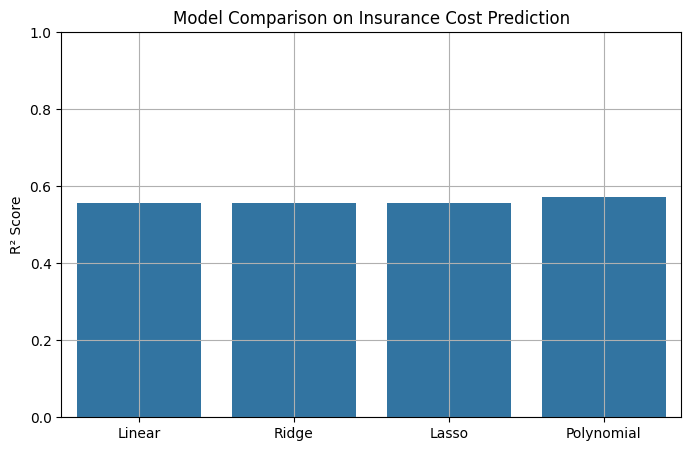

In [34]:
# 📊 Step 13: Final Comparison Visualization
models = ['Linear', 'Ridge', 'Lasso', 'Polynomial']
r2_scores = [
    r2_score(y_test, y_pred_lr),
    r2_score(y_test, y_pred_ridge),
    r2_score(y_test, y_pred_lasso),
    r2_score(y_test, y_pred_poly)
]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=r2_scores)
plt.ylabel("R² Score")
plt.title("Model Comparison on Insurance Cost Prediction")
plt.ylim(0, 1)
plt.grid(True)
plt.show()


In [ ]:
# Example of using LinearRegression with RFE
import pandas as pd
from sklearn.linear_model import LinearRegression
# Sample data
data = {

    'x1': [1, 2, 3, 4],

    'x2': [2, 1, 0, -1],

    'x3': [3, 4, 5, 6],

    'y' : [10, 12, 14, 16]
    
}
df = pd.DataFrame(data)
X = df[['x1', 'x2', 'x3']]
y = df['y']
model = LinearRegression().fit(X, y)
print("Coefficients:", model.coef_)



Sample Output:

Interpretation:
    • x1 → coef = 0.666
    • x2 → coef = -0.6666 ✅ (least important)
    • x3 → coef = 0.6666
🔻 Remove x2.


Step 2: Train Model on Remaining Features (x1, x3)

In [ ]:
X_reduced = df[['x1', 'x3']]
model2 = LinearRegression().fit(X_reduced, y)
print("Coefficients (reduced):", model2.coef_)


Now both features (x1, x3) contribute to predicting y.

✅ RFE has selected the top 2 features: x1 and x3.


📌 Do This with RFE Automatically in Code


In [ ]:
from sklearn.feature_selection import RFE
# Fit RFE to select top 2 features
rfe = RFE(LinearRegression(), n_features_to_select=2)
rfe.fit(X, y)
print("Selected Features:", X.columns[rfe.support_].tolist())
print("Feature Ranking:", rfe.ranking_)
